In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#to load the file
df=pd.read_csv("creditcard.csv")

In [3]:
# first 5 records
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
#to remove the uncessary columns
df.drop(['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28'],axis=1,inplace=True)

In [5]:
df.head()

,Time,Amount,Class
0,0.0,149.62,0
1,0.0,2.69,0
2,1.0,378.66,0
3,1.0,123.50,0
4,2.0,69.99,0


In [6]:
#random values
df.sample(20)

,Time,Amount,Class
25963,33847.0,33.35,0
92354,63896.0,14.49,0
97600,66292.0,3.69,0
46381,42766.0,1.52,0
11261,19554.0,0.76,0
151268,95185.0,27.49,0
200162,133312.0,80.41,0
141959,84537.0,99.95,0
54852,46656.0,50.00,0
3399,2922.0,1.00,0


In [7]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [8]:
#to check null values
df.isnull().sum()

Time      0
Amount    0
Class     0
dtype: int64

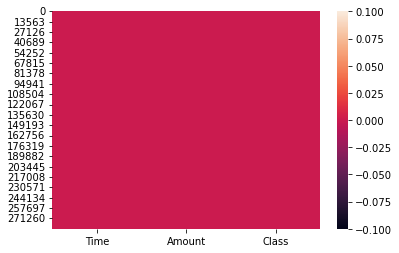

In [9]:
#visualise
sb.heatmap(df.isnull())
plt.show()

In [10]:
#check data types
df.dtypes

Time      float64
Amount    float64
Class       int64
dtype: object

In [11]:
#check duplicates values
df.duplicated().sum()

4857

In [12]:
#how many rows and columns
df.shape

(284807, 3)

0    284315
1       492
Name: Class, dtype: int64


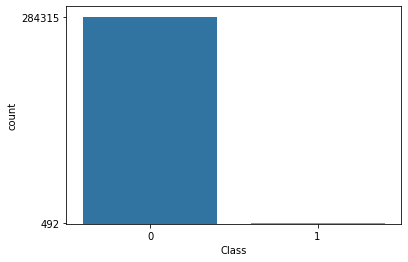

In [13]:
#check balance or unbalance 
#here target:class
#check categorical data use countplot
sb.countplot(data=df,x='Class')
f=df['Class'].value_counts()
print(f)
plt.yticks(f)
plt.show()

In [14]:
#clearly undesstand ,data is unbalance

In [15]:
#select input and output
x=df.drop("Class",axis=1) #select input
y=df['Class']  #select output

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
#train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [18]:
x_train.head()

,Time,Amount
191125,129124.0,14.37
153710,99901.0,9.00
261216,159917.0,1.98
190724,128961.0,4.60
127492,78349.0,46.87


In [19]:
y_train.head()

191125    0
153710    0
261216    0
190724    0
127492    0
Name: Class, dtype: int64

In [20]:
#Apply StandardScaler
from sklearn.preprocessing import StandardScaler
#create the object of StandardScaler class
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

In [21]:
#first check Y_train(0 & 1): how many sample of 0's and 1's
y_train.value_counts()

0    199007
1       357
Name: Class, dtype: int64

In [22]:
#clearly understand, data is unbalance
#now we have to balance to given dataset means Y_train 
#use RandomOverSampler means to convert minorty class into majority class
#means increase means make a duplicates copy of some records randomly 
#and force minority class converts to majority class

In [25]:
pip install imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
  Using cached imbalanced_learn-0.9.1-py3-none-any.whl (199 kB)
Note: you may need to restart the kernel to use updated packages.


In [24]:
from imblearn.over_sampling import RandomOverSampler
#RandomOverSampler inbuilt class which defined in outer class over sampling & over_sampling defined in inbuilt class\

ModuleNotFoundError: No module named 'imblearn'

In [ ]:
#create the object of class RandomOverSampler
ros=RandomOverSampler(random_state=1)
x_train1,y_train1=ros.fit_resample(x_train,y_train)
#fit_resample() inbuilt method of RandomOverSampler class

In [ ]:
x_train1.shape,y_train1.shape

In [ ]:
#check y_train
y_train1.value_counts()

In [ ]:
#check y_test
y_test.value_counts()

In [ ]:
#clearly,y_test data is unbalanced

In [ ]:
ros=RandomOverSampler(random_state=1)
x_test1,y_test1=ros.fit_resample(x_test,y_test)

In [ ]:
x_test1.shape,y_test1.shape

In [ ]:
#again check y_test1
y_test1.value_counts()

In [ ]:
#create a function for user defined
def create_model(model):
    #first train the model with 70% data
    model.fit(x_train1,y_train1)
    #train the model with 30% data
    y_pred=model.predict(x_test1)
    
    #generate report
    print(classification_report(y_test1,y_pred))
    print(confusion_matrix(y_test1,y_pred))
    return model

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

# LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression 

In [ ]:
#create the object of LogisticRegression class
lr=LogisticRegression()

In [ ]:
#call function
lr=create_model(lr)

In [ ]:
#here recall is 0.56(56%)

# DecisionTreeClassifier(GINI INDEX)

In [ ]:
#call class
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#create the object of DecisionTreeClassifier class
dt=DecisionTreeClassifier()

In [ ]:
#call function
dt=create_model(dt)

In [ ]:
#here recall is 0.12(12%)

# 1st Purning Technique

In [ ]:
#max_depth=8

In [ ]:
"""for i in range(1,9):  #start=1 stop=9-1=8 step=1
    dt=DecisionTreeClassifier(random_state=1,max_depth=i)
    print("max depth:",i)
    #call function
    dt=create_model(dt)"""

In [ ]:
dt=DecisionTreeClassifier(random_state=1,max_depth=2)
#call function
dt=create_model(dt)

In [ ]:
#here recall is 0.66(66%)

# 2nd Purning Technique

In [ ]:
#min_samples_leaf(10-100)

In [ ]:
"""for i in range(10,101):  #start=10 stop=101-1=100 step=1
    dt2=DecisionTreeClassifier(random_state=1,min_samples_leaf=i)
    print("min_samples_leaf:",i)
    #call function
    dt2=create_model(dt1)"""

In [ ]:
dt2=DecisionTreeClassifier(random_state=1,min_samples_leaf=98)
#call function
dt2=create_model(dt2)

In [ ]:
#here recall is 0.33(33%)

# DecisionTreeClassifier(Entropy) 

In [ ]:
#call class
#from sklearn.tree import DecisionTreeClassifier

In [ ]:
#create the object of DecisionTreeClassifier class
dt=DecisionTreeClassifier(random_state=1,criterion="entropy")

In [ ]:
#call function
dt=create_model(dt)

In [ ]:
#here recall is 0.12(12%)

# 1st Purning Technique

In [ ]:
#max depth

In [ ]:
"""for i in range(1,9): #start=1 stop=9-1=8 step=1
    dt1=DecisionTreeClassifier(random_state=1,criterion="entropy",max_depth=i)
    print("max_depth:",i)
    #call function
    dt1=create_model(dt1)"""

In [ ]:
dt1=DecisionTreeClassifier(random_state=1,criterion="entropy",max_depth=2)
#call function
dt1=create_model(dt1)

In [ ]:
#here recall is 0.66(66%)

# 2nd Purning Technique

In [ ]:
#min_samples_leaf

In [ ]:
"""for i in range(10,101): #start=10 stop=101-1=100 step=1
    dt2=DecisionTreeClassifier(random_state=1,criterion="entropy",min_samples_leaf=i)
    print("min_samples_leaf:",i)
    #call function
    dt2=create_model(dt2)"""

In [ ]:
dt2=DecisionTreeClassifier(random_state=1,criterion="entropy",min_samples_leaf=96)
#call function
dt2=create_model(dt2)

In [ ]:
#here recall is 0.32(32%)

# RandomForestClassifier

In [ ]:
#Apply Random Forest Tree :It is Bootstraping Ensembling Technique
#It is work with Bagging classifier Bootstraping Ensembling Technique
#In RandomForestTree:Train the dataset on multiple DecisionTree Algo.
#sklearn-package
#Ensemble -outer class
#RandomForestClassifier class -inner calss
#fit()
#predict()
#ensemble means to train given dataset on multiple algo.

In [ ]:
#call class
from sklearn.ensemble import RandomForestClassifier

In [ ]:
"""for i in range(10,101):
    rfc=RandomForestClassifier(n_estimators=i,random_state=1)
    print("Random Forest is:",i)
    #call function
    rfc=create_model(rfc)"""

In [ ]:
#create the object of RandomForestClassifier class
rfc=RandomForestClassifier(n_estimators=10,random_state=1)
#call function
rfc=create_model(rfc)

In [ ]:
#here recall is 0.12(12%)

# Purning Technique

In [ ]:
#max depth

In [ ]:
"""for i in range(1,19):  #start=1,stop=19-1=18 step=1
    rfc1=RandomForestClassifier(n_estimators=10,random_state=1,max_depth=i)
    print("max depth:",i)
    #call function
    rfc1=create_model(rfc1)"""

In [ ]:
rfc1=RandomForestClassifier(n_estimators=10,random_state=1,max_depth=1)
#call function 
rfc1=create_model(rfc1)

In [ ]:
#here recall is 0.67(67%)

# 2nd Purning Technique

In [ ]:
#min_samples_leaf

In [ ]:
"""for i in range(10,101):  #start=1,stop=101-1=100 step=1
    rfc2=RandomForestClassifier(n_estimators=10,random_state=1,min_samples_leaf=i)
    print("max depth:",i)
    #call function
    rfc2=create_model(rfc2)"""

In [ ]:
rfc2=RandomForestClassifier(n_estimators=10,random_state=1,min_samples_leaf=85)
#call function
rfc2=create_model(rfc2)

In [ ]:
#here recall is 0.41(41%)

# Boosting Technique

1.AdaBoostClassifier

In [ ]:
#Apply Ensembling Technique Boosting
#1.first apply ADA Boost: call inbuilt class AdaBoostClassifier
#sklearn-package
#ensemble -outer class
#AdaBoostClassifier-inner class

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
#create the object of AdaBoostClassifier class
"""for i in range(1,14): #start=1,stop=14-1=13 step=1
    ada=AdaBoostClassifier(n_estimators=i,random_state=1)
    print("ADA Boost:",i)
    #call function
    ada=create_model(ada)"""

In [ ]:
ada=AdaBoostClassifier(n_estimators=13,random_state=1)
#call function
ada=create_model(ada)

In [ ]:
#here recall is 0.69(69%)

2. GRADIENT BOOSTING

In [ ]:
#2. Gradient Boosting(GB) : - 
#Its basically focus on short comings error  means fully grown tree 
#error means residual =actual output-predicted output

#2. gradient Boost technuique : second tech. of Boosting Ensembling 
#technique 
# GB  : - its create a fully grown tree.this algorithm is focus on 
#short comings 
#short comings means error

In [ ]:
#call inbuilt class for gradient boosting:GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
"""for i in range(10,101):  #start=10 stop=101-1=100 step=1
    #create the object of GradientBoostingClassifier class
    gbc=GradientBoostingClassifier(n_estimators=i,random_state=1)
    print('no. of estimators:',i)
    #call function
    gbc=create_model(gbc)"""

In [ ]:
gbc=GradientBoostingClassifier(n_estimators=27,random_state=1)
#call function
gbc=create_model(gbc)

In [ ]:
#here recall is 0.63(63%)

3.EXTREME GRADIENT BOOSTING (XGB)

In [ ]:
#3. Extreame Gradient Boosting  : 3rd technique of Boosting 
#This is better version of gradient boosting . . short form XGB 
#why call better version of Gradient Boosting : -
#1. XG Bossting use : - Multithreading technique
#2. It takes less memory space and faster 
#3. It is very useful to handle huge amt of data .Its deal large amount of data
#4. Its handle outlier because have inbuilt capability
#5. Its handle null values 
#6. Its handle automatic overfitting situation .

In [ ]:
#Call inbuilt class:XGBClassifier
#inbuilt package xgboost
#first time install xgboost on system
#!pip install xgboost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
"""for i in range(10,101):  #start=10 step=101-1=100 step=1
    #create the objrct of GradientBoostingClassifier class
    xgc=XGBClassifier(n_estimators=i,reg_alpha=1,random_state=1)
    #reg_alpha=1 means yes
    print('no. of estimators:',i)
    #call function
    xgc=create_model(xgc)"""

In [ ]:
xgc=XGBClassifier(n_estimators=11,reg_alpha=1,random_state=1)
xgc=create_model(xgc)

In [ ]:
#here recall is 0.51(51%)

# Support Vector Machine(SVM)

1.linear kernal function of SVM 

In [ ]:
#give data in support vector machine
#1.linear kernal function of SVM:
#means suppose data are linear separatable with the help of straight line
#call inbuilt class for linear SVM:LinearSVC
#SVC means support vector classifier
#sklearn=package
#svm-outer class
#LinearSVC -inner class
#fit()
#predict()
from sklearn.svm import LinearSVC

In [ ]:
#create the object of LinearSVC class
svc=LinearSVC(random_state=1)#no add any error means suppose no outlier in our 
#dataset means it is hard margin

In [ ]:
#call function
svc=create_model(svc)

In [ ]:
#here recall is 0.56(56%)

2.polynomial

In [ ]:
#call inbuilt class SVC
from sklearn.svm import SVC

In [ ]:
#CREATE OBJ of SVC class(use polynomial)
poly_svc=SVC(random_state=1,kernel='poly')

In [ ]:
#call function
poly_svc=create_model(poly_svc)

In [ ]:
#here recall is 0.54%(54%)

3.radial

In [ ]:
#CREATE OBJ of SVC class(use radial) :value of kernal =rbf
#rbf=radial basic function
r_svc=SVC(random_state=1,kernel='rbf')

In [ ]:
#call function
r_svc=create_model(r_svc)

In [ ]:
#here recall is

# KNN Algorithm

In [ ]:
#Apply KNN Algorithm: inbuilt class KNeighboursClassifier which definer in outer class nrighbours and 
#outer class define in package sklearn
from sklearn.neighbors import KNeighborsClassifier
#create the objecrt of KNeighboursClassifier class and passing some parameters
knc=KNeighborsClassifier(n_neighbors=3,metric="minkowski",p=2)
#p=2 means Euclidean distance method

In [ ]:
#call function
knc=create_model(knc)
#recall 0.78(78%)